In [7]:
import numpy as np
import skimage as ski
from skimage import io
import matplotlib.pyplot as plt

In [2]:
def conv(mat, kernel):
    r, c = mat.shape
    n = len(kernel)
    rows, cols = r-(n-1), c-(n-1)
    out = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            temp = 0
            for k in range(n):
                for l in range(n):
                    temp += mat[i + k, j + l]*kernel[k, l]
            out[i, j] = temp
    return out

In [3]:
m = np.random.randint(1, 10, (10, 8))
print(m)

[[4 6 7 6 8 5 8 9]
 [1 3 7 8 7 4 9 2]
 [9 8 3 6 8 9 7 3]
 [4 1 8 3 9 3 9 9]
 [6 9 2 3 7 3 4 3]
 [8 9 6 1 5 7 5 9]
 [2 2 2 6 5 7 5 9]
 [2 9 1 2 9 2 9 2]
 [7 4 3 8 1 3 6 5]
 [6 9 7 3 7 4 1 2]]


In [4]:
k = np.array([[1, 2, 1],
              [2, 4, 2],
              [1, 2, 1]])
k = k / np.sum(k)

In [5]:
out = conv(m, k)
print(out)

[[4.9375 6.     6.875  6.875  6.6875 6.5   ]
 [5.25   5.3125 6.1875 7.     7.125  6.625 ]
 [5.125  4.75   5.25   6.1875 6.125  6.25  ]
 [6.125  4.625  4.125  5.125  5.125  5.25  ]
 [6.125  4.5    3.75   4.9375 5.5625 5.75  ]
 [4.3125 3.6875 4.0625 5.375  5.875  6.25  ]
 [4.25   3.5    4.1875 5.     5.0625 5.625 ]
 [5.5    4.6875 4.625  4.3125 4.     4.375 ]]


In [17]:
im = ski.data.chelsea()
im = np.average(im, weights=[0.2125, 0.7154, 0.0721], axis=-1)

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_9636\4070007534.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


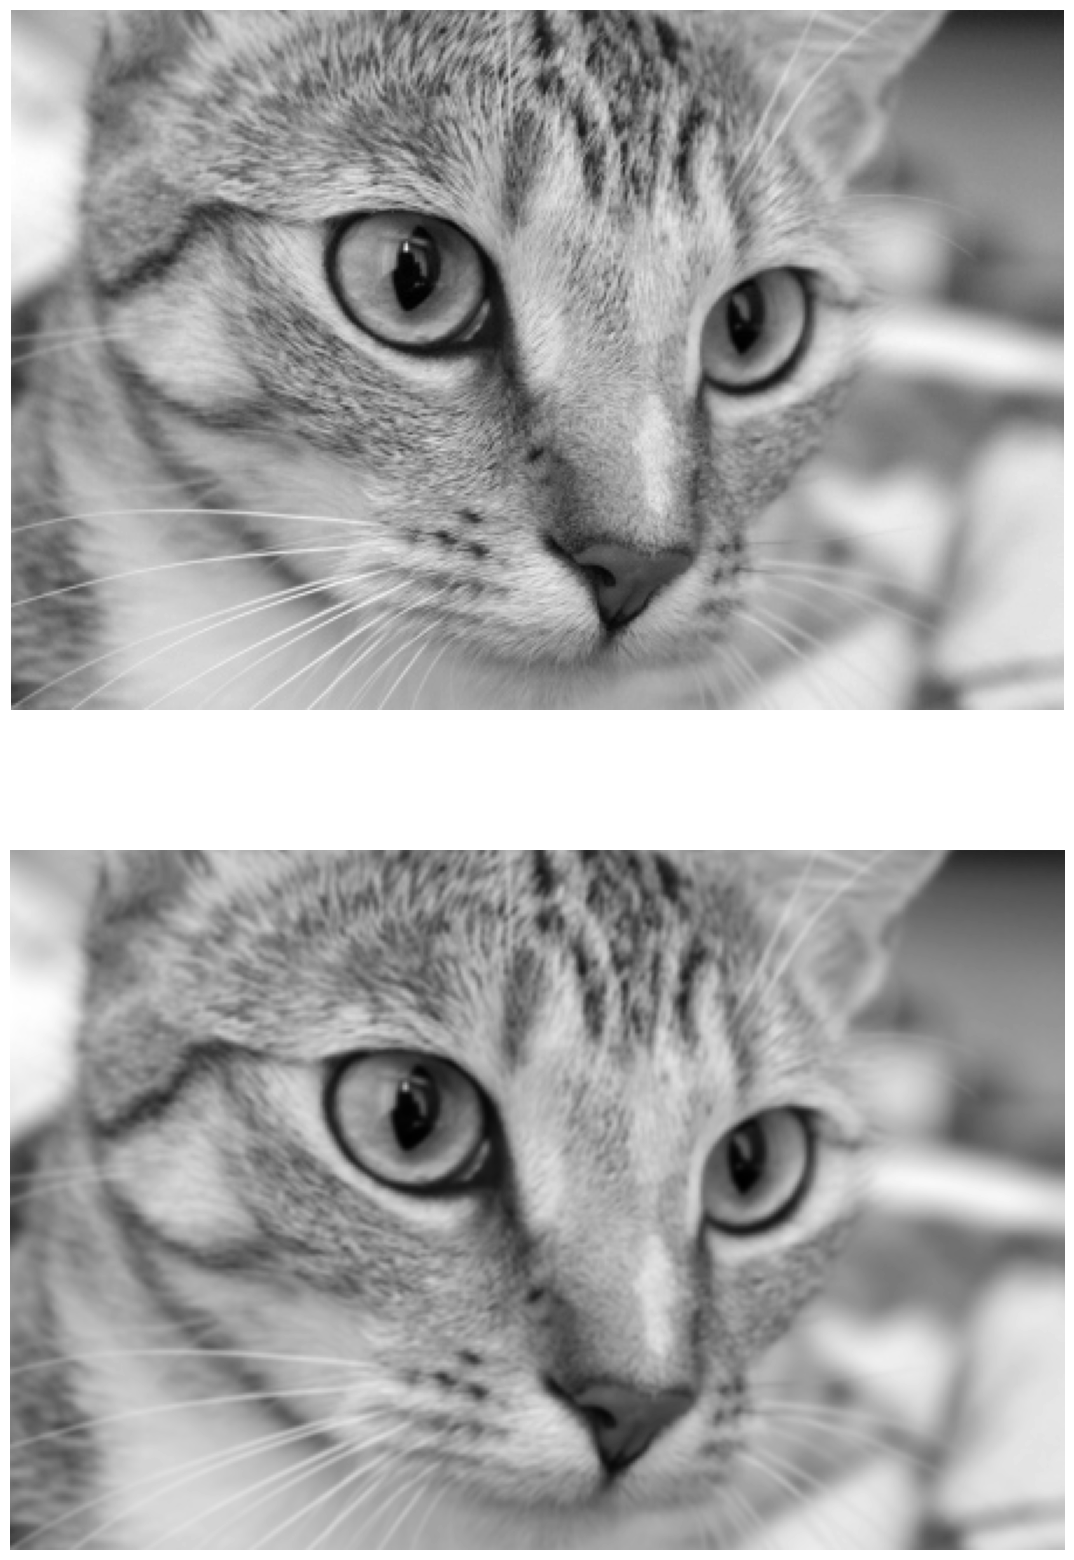

In [22]:
filteredim = conv(im, k)
plt.subplots(figsize=(15, 20))
plt.subplot(211)
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.subplot(212)
plt.axis('off')
plt.imshow(filteredim, cmap='gray')

In [54]:
def make_gaussian(n):
    m = n // 2 + 1
    k = np.zeros((n, n), dtype=int)
    for i in range(m):
        for j in range(m):
            k[i, j] = (2**j)*(2**i)
            k[i, n-j-1] = (2**j)*(2**i)
    for i in range(m):
        k[n - i - 1] = k[i]
    return k/np.sum(k)

1.0

In [58]:
k = make_gaussian(5)
print(k)

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


In [59]:
k = make_gaussian(11)

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_9636\4070007534.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


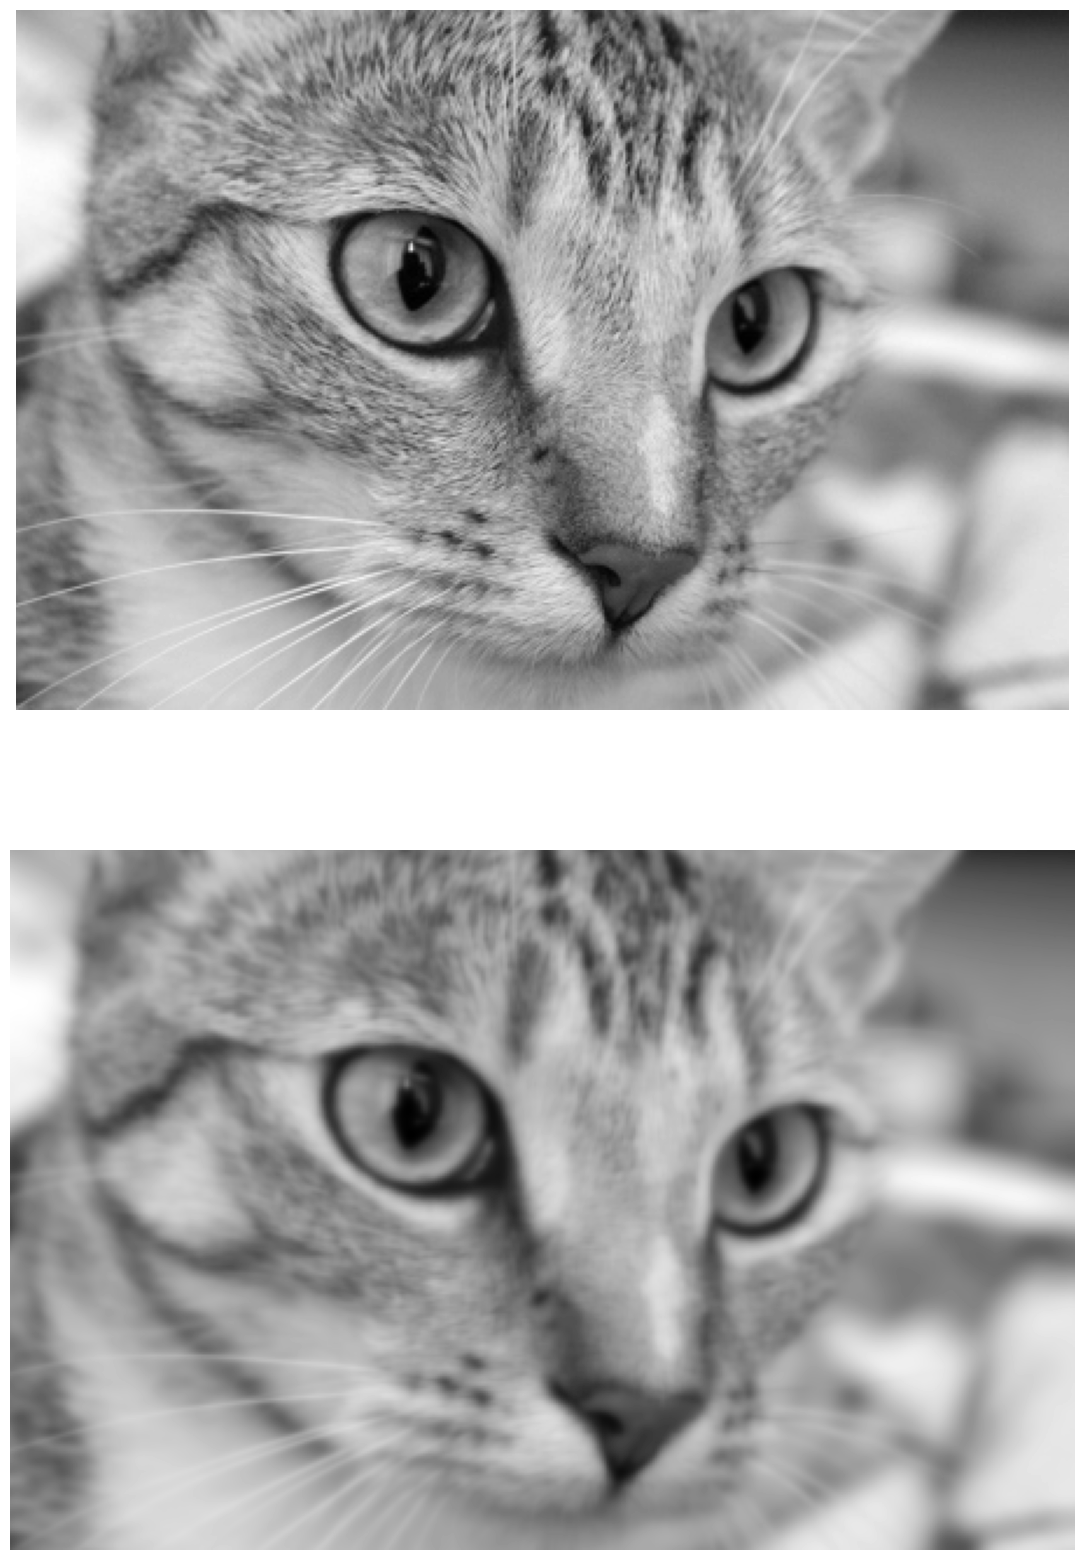

In [56]:
filteredim = conv(im, k)
plt.subplots(figsize=(15, 20))
plt.subplot(211)
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.subplot(212)
plt.axis('off')
plt.imshow(filteredim, cmap='gray')

In [64]:
im = ski.io.imread('s&p.jpg')
im = np.average(im, weights=[0.2125, 0.7154, 0.0721], axis=-1)

In [65]:
k = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]])

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_9636\2458365738.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


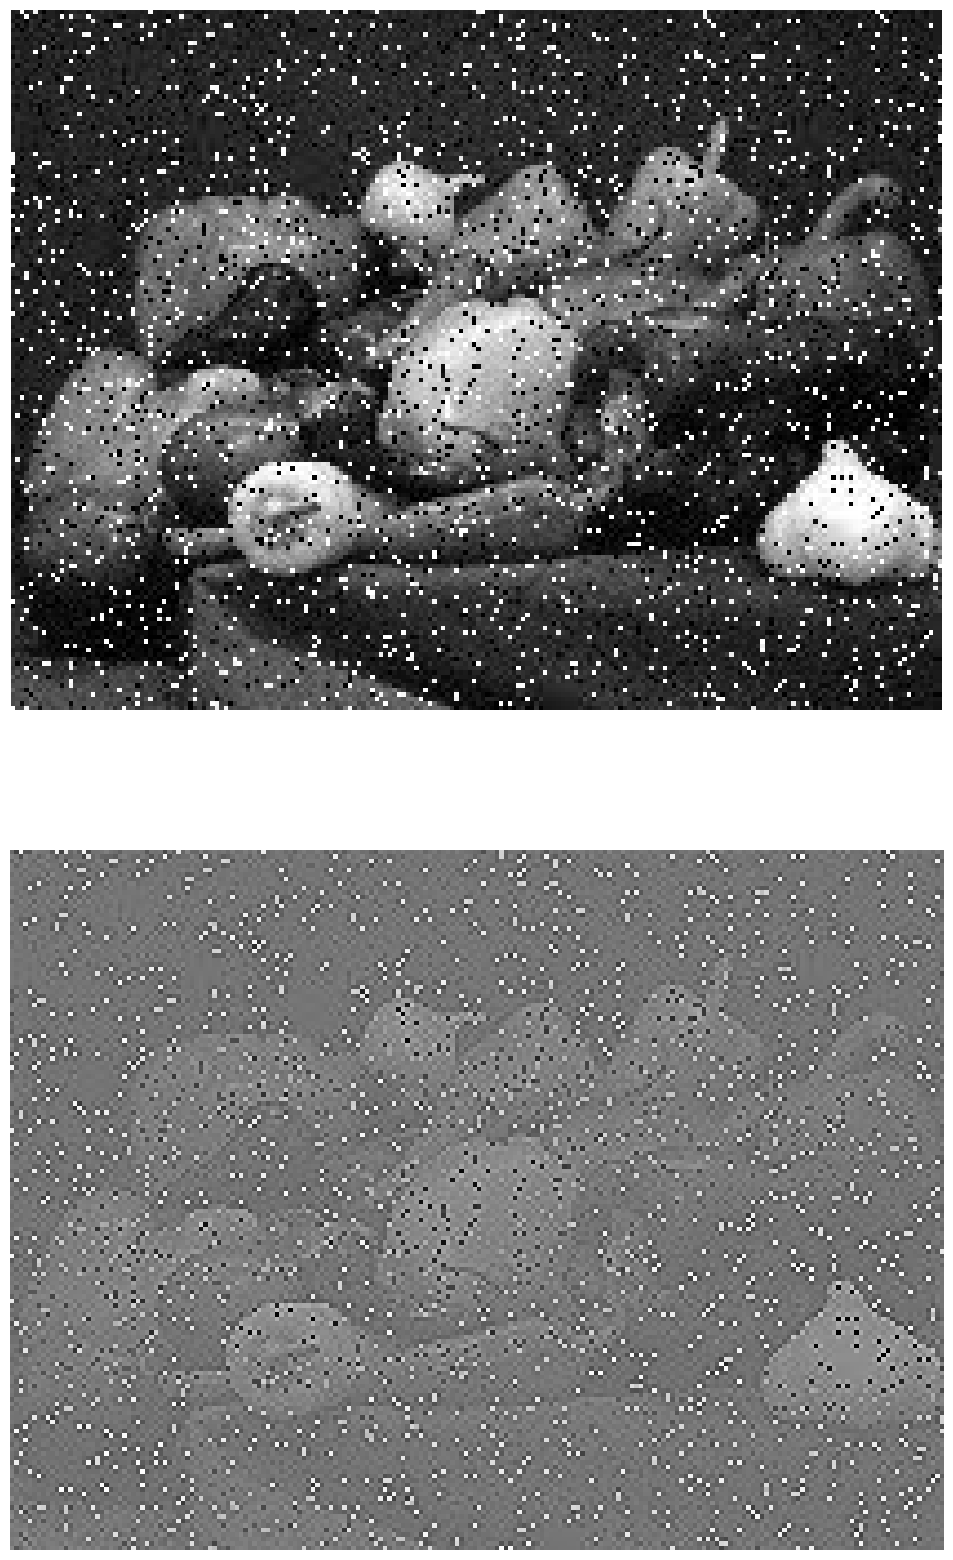

In [72]:
n, m = im.shape
out = im[1:n-1, 1:m-1] - conv(im, k)
out = out - np.min(out)
out = 255*(out/np.max(out))

plt.subplots(figsize=(15, 20))
plt.subplot(211)
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.subplot(212)
plt.axis('off')
plt.imshow(filteredim, cmap='gray')